In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [2]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [3]:
df = pd.read_csv('GE.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-06,158.230774,158.615387,156.692307,158.076920,119.483620,6614569
2011-04-07,157.615387,157.692307,155.307693,156.538467,118.320808,6778655
2011-04-08,157.615387,157.846161,154.384613,155.307693,117.390549,6306352
2011-04-11,155.692307,156.692307,154.461533,155.230774,117.332413,3807856
2011-04-12,154.000000,155.076920,152.307693,153.923080,116.343910,6337669


                  Open   Volume
Date                           
2011-04-06  158.230774  6614569
2011-04-07  157.615387  6778655
2011-04-08  157.615387  6306352
2011-04-11  155.692307  3807856
2011-04-12  154.000000  6337669
...                ...      ...
2022-03-30   93.620003  5633600
2022-03-31   93.750000  8225700
2022-04-01   92.099998  5640900
2022-04-04   92.180000  5139600
2022-04-05   91.660004  6719000

[2769 rows x 2 columns]


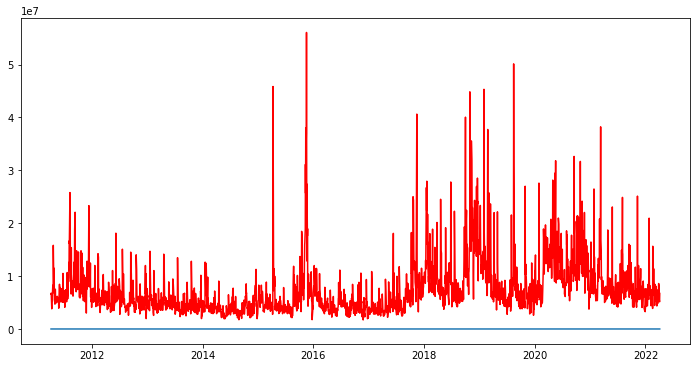

In [4]:
plt.figure(figsize=(12,6))
open_p, = plt.plot(df['Open'])
volume, = plt.plot(df['Volume'], color='red')
print(df[["Open", "Volume"]])

# Normalize

In [5]:
avgs = df.mean()
devs = df.std()
print(avgs)

Open         1.499679e+02
High         1.513291e+02
Low          1.485388e+02
Close        1.499172e+02
Adj Close    1.333773e+02
Volume       7.426788e+06
dtype: float64


In [6]:
df["Open"] = (df["Open"] - avgs.loc["Open"]) / devs.loc["Open"]
df["Volume"] = (df["Volume"] - avgs.loc["Volume"]) / devs.loc["Volume"]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-06,0.142598,158.615387,156.692307,158.076920,119.483620,-0.158215
2011-04-07,0.131978,157.692307,155.307693,156.538467,118.320808,-0.126252
2011-04-08,0.131978,157.846161,154.384613,155.307693,117.390549,-0.218253
2011-04-11,0.098790,156.692307,154.461533,155.230774,117.332413,-0.704944
2011-04-12,0.069585,155.076920,152.307693,153.923080,116.343910,-0.212153


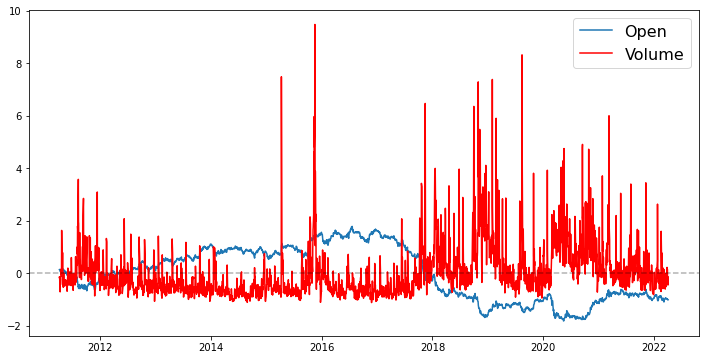

In [7]:
plt.figure(figsize=(12,6))
openp, = plt.plot(df['Open'])
volume, = plt.plot(df['Volume'], color='red')

plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Open', 'Volume'], fontsize=16)

# First Diff

In [8]:

df["Open"]= df["Open"].diff().dropna()
df["Volume"]= df["Volume"].diff().dropna()
#df = pd.concat([train_dates.reset_index(drop=True),openp.reset_index(drop=True),volume.reset_index(drop=True)], axis=1)
#df.index = pd.to_datetime(df.index)

print(df["Open"])


Date
2011-04-06         NaN
2011-04-07   -0.010620
2011-04-08    0.000000
2011-04-11   -0.033188
2011-04-12   -0.029205
                ...   
2022-03-30    0.010355
2022-03-31    0.002243
2022-04-01   -0.028475
2022-04-04    0.001381
2022-04-05   -0.008974
Name: Open, Length: 2769, dtype: float64


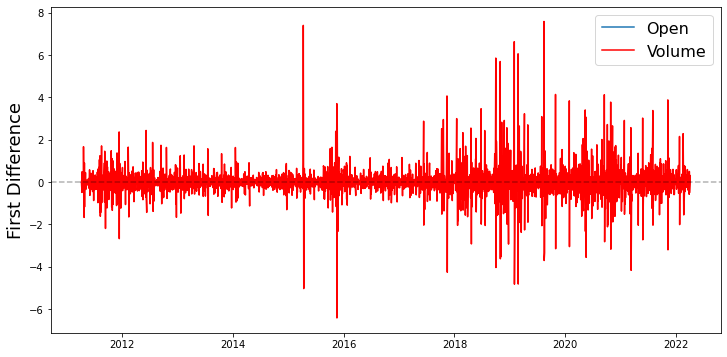

In [9]:
plt.figure(figsize=(12,6))
openp, = plt.plot(df['Open'])
volume, = plt.plot(df['Volume'], color='red')
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open', 'Volume'], fontsize=16)

In [10]:
df= df.iloc[:,[0,5]]
annual_volatility = df.groupby(df.index.year).std()
annual_volatility

,Open,Volume
Date,,
2011,0.043017,0.650042
2012,0.032038,0.483550
2013,0.034249,0.389675
2014,0.032885,0.303503
2015,0.049721,0.922891
2016,0.042461,0.328169
2017,0.044848,0.652519
2018,0.042994,1.118800
2019,0.033837,1.179431


In [11]:
#Still need to work on removing the volatility
df['Open_annual_vol'] = df.index.map(lambda d: annual_volatility.loc[d.year, 'Open'])
df['Volume_annual_vol'] = df.index.map(lambda d: annual_volatility.loc[d.year, 'Volume'])


In [12]:
df

,Open,Volume,Open_annual_vol,Volume_annual_vol
Date,,,,
2011-04-06,NaN,NaN,0.043017,0.650042
2011-04-07,-0.010620,0.031963,0.043017,0.650042
2011-04-08,0.000000,-0.092001,0.043017,0.650042
2011-04-11,-0.033188,-0.486690,0.043017,0.650042
2011-04-12,-0.029205,0.492791,0.043017,0.650042
...,...,...,...,...
2022-03-30,0.010355,-0.576744,0.034987,0.609990
2022-03-31,0.002243,0.504924,0.034987,0.609990
2022-04-01,-0.028475,-0.503502,0.034987,0.609990


In [13]:
df['Open'] = df['Open'] / df['Open_annual_vol']
df['Volume'] = df['Volume'] / df['Volume_annual_vol']

In [14]:
df.dropna()

,Open,Volume,Open_annual_vol,Volume_annual_vol
Date,,,,
2011-04-07,-0.246883,0.049170,0.043017,0.650042
2011-04-08,0.000000,-0.141532,0.043017,0.650042
2011-04-11,-0.771508,-0.748706,0.043017,0.650042
2011-04-12,-0.678925,0.758091,0.043017,0.650042
2011-04-13,0.092583,-0.339008,0.043017,0.650042
...,...,...,...,...
2022-03-30,0.295959,-0.945498,0.034987,0.609990
2022-03-31,0.064122,0.827757,0.034987,0.609990
2022-04-01,-0.813879,-0.825426,0.034987,0.609990


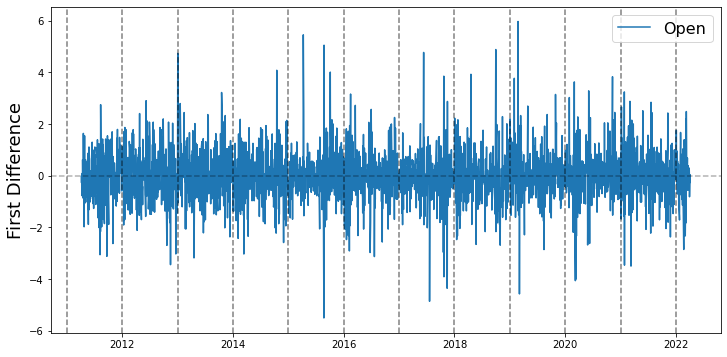

In [15]:
plt.figure(figsize=(12,6))
openp, = plt.plot(df['Open'])

for year in range(2011, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open'], fontsize=16)

In [16]:
#Seasonality

month_avgs = df.groupby(df.index.month).mean()
print(month_avgs)

          Open    Volume  Open_annual_vol  Volume_annual_vol
Date                                                        
1    -0.026559  0.043872         0.039417           0.712534
2     0.074861 -0.030643         0.039427           0.706375
3    -0.002002 -0.010110         0.039524           0.709701
4    -0.017602  0.001118         0.040028           0.712758
5    -0.034244 -0.004430         0.040057           0.711441
6    -0.002042  0.007289         0.040336           0.712662
7    -0.022710  0.013093         0.040126           0.716085
8    -0.106100 -0.015549         0.040155           0.711153
9    -0.007015  0.008204         0.040259           0.710945
10    0.050457  0.019835         0.040130           0.715873
11    0.023003 -0.003415         0.040220           0.713662
12    0.004165 -0.034544         0.040202           0.711445


In [17]:
df['open_month_avg'] = df.index.map(lambda d: month_avgs.loc[d.month, 'Open'])
df['volume_month_avg'] = df.index.map(lambda d: month_avgs.loc[d.month, 'Volume'])

In [18]:
df['Open'] = df['Open'] - df['open_month_avg']
df['Volume'] = df['Volume'] - df['volume_month_avg']

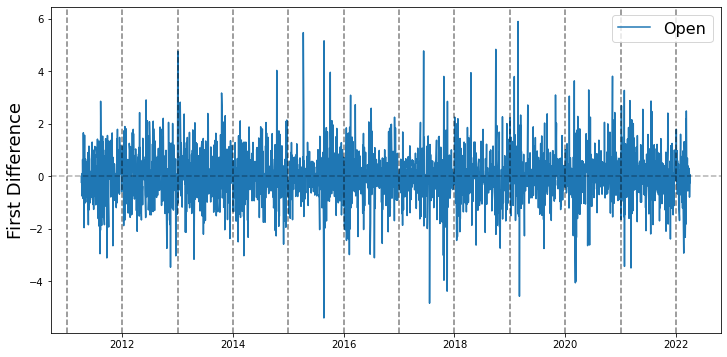

In [19]:
plt.figure(figsize=(12,6))
openp, = plt.plot(df['Open'])

for year in range(2011, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open'], fontsize=16)

# PACF

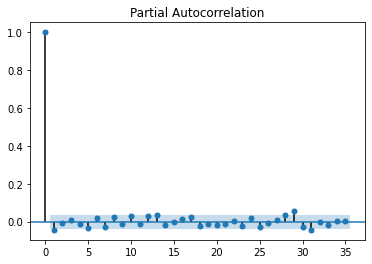

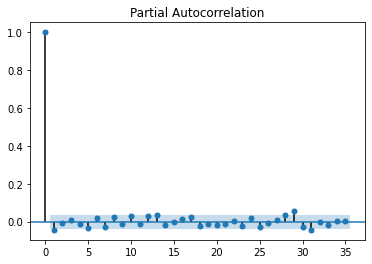

In [20]:
plot_pacf(df['Open'].dropna())

In [21]:
for lag in range(1, 16):
    volume_series = df['Volume'].dropna().iloc[lag:]
    lagged_open_series = df['Open'].dropna().iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(volume_series, lagged_open_series))
    print('------')

Lag: 1
(-0.02791845639040225, 0.14205069364771)
------
Lag: 2
(-0.038675735534379835, 0.04196109545112206)
------
Lag: 3
(0.004714370721303743, 0.8042997553502168)
------
Lag: 4
(0.037889698220194806, 0.046391035414213716)
------
Lag: 5
(0.01940535101697671, 0.30788874437910735)
------
Lag: 6
(-0.007679911245568349, 0.6866253494379556)
------
Lag: 7
(0.003623538828821034, 0.8490630475039642)
------
Lag: 8
(-0.015830309490782173, 0.4057862273848742)
------
Lag: 9
(0.010771790311425332, 0.5716922124634428)
------
Lag: 10
(-0.037730376153574705, 0.04755980507400479)
------
Lag: 11
(0.00900123563642121, 0.6366238914814218)
------
Lag: 12
(0.04251160641900466, 0.025631188534048308)
------
Lag: 13
(-0.016553174673057655, 0.385115313796019)
------
Lag: 14
(-0.004840128651883006, 0.7995811658028744)
------
Lag: 15
(-6.619710616655264e-05, 0.9972299728732072)
------


# VAR

In [22]:
df = df[['Open', 'Volume']].dropna()

In [23]:
model = VAR(df)

/Users/WassimBoutabratine_1/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
model_fit = model.fit(maxlags=13)

In [25]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 16, Apr, 2022
Time:                     02:53:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.118604
Nobs:                     2755.00    HQIC:                 -0.192736
Log likelihood:          -7441.10    FPE:                   0.790838
AIC:                    -0.234663    Det(Omega_mle):        0.775562
--------------------------------------------------------------------
Results for equation Open
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000395         0.018945            0.021           0.983
L1.Open           -0.039618         0.019142           -2.070           0.038
L1.Volume         -0.074023         0.021464           -3.449           0